During the early moments of the Alien Invasion, it will be nescessary to be able to run from the aliens until the human resistance has formed. As aliens typically levitate, and their speeds are unaffected by changes in elevation, stairs serve as a huge detriment for fleeing humans. Having to climb a lengthy set of stairs could prove the difference between escaping a pursuing alien and being captured. Therefore, for this sub-metric, we determine the neighborhood with the least amount of stairs that would provide the best enviornment for running for your life.

In [3]:
#Loading data
import pandas as pd
Stairs = pd.read_csv("stepstats.csv", index_col="id")

In [4]:
#Sample some data
Stairs.sample(10)

,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,transit_rider_count,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,
1098705666,Belle Isle Ave from Woodward Ave to Plainview Ave,4th Division,1947-01-01,Concrete,183.0,14.0,0.0,100.0,726.0,119.0,...,Brookline,4.0,19.0,42003191900,5.0,19.0,6.0,4-26,40.400006,-80.021970
1525535447,Thornton St and Surban Ave to Sherwood Ave,5th Division,1960-01-01,Concrete,208.0,41.0,2.0,7.0,750.0,61.0,...,Sheraden,2.0,20.0,42003562500,5.0,20.0,6.0,1-16,40.455268,-80.057512
2043525698,Glen Mawr St from W Carson St,5th Division,1949-01-01,Concrete,269.0,32.0,NaN,NaN,NaN,NaN,...,Esplen,2.0,20.0,42003562500,5.0,20.0,6.0,1-27,40.454032,-80.040924
39528215,Wertz Way from Ella St to Wertz Way,2nd Division,NaN,Concrete,92.0,14.0,0.0,100.0,943.0,209.0,...,Bloomfield,7.0,8.0,42003080200,2.0,8.0,5.0,3-1,40.460368,-79.953813
1692813899,Arsenal Park 6,Parks - Northeast,NaN,Stone,NaN,NaN,NaN,NaN,NaN,NaN,...,Lower Lawrenceville,7.0,6.0,42003060300,2.0,6.0,2.0,3-3,40.466610,-79.960861
986328071,Jillson St from Kenilworth to Plainview Ave,4th Division,NaN,Concrete,113.0,5.0,NaN,NaN,NaN,NaN,...,Brookline,4.0,19.0,42003191900,5.0,19.0,6.0,4-26,40.396156,-80.026233
1475103503,E Woodford Ave from Fromm Way to Hazeldell St,4th Division,NaN,Concrete,151.0,61.0,NaN,NaN,NaN,NaN,...,Carrick,4.0,29.0,42003290200,3.0,29.0,3.0,4-12,40.393272,-79.984850
1428879814,St Thomas St from Hackstown St to Monastery St,4th Division,1947-01-01,Concrete,100.0,6.0,1.0,6.0,852.0,75.0,...,South Side Slopes,3.0,17.0,42003170600,3.0,17.0,3.0,4-3,40.424012,-79.985317
351278790,Highland Park 3,Parks - Northeast,NaN,Stone,NaN,NaN,NaN,NaN,NaN,NaN,...,Highland Park,7.0,11.0,42003980100,2.0,11.0,5.0,3-9,40.479478,-79.911912


In order to guarantee a successful getaway from hostile alien forces, it is important to consider the outdoor stairways found in each neighborhood. Having to climb stairs, instead of running away on flat road, could make community members more suscepitble to the effects of an alien invasion. In this notebook, we will consider both how often a neighborhood resident might encounter a stairway during their getaway and also how many stairs they will encounter on average.

In [57]:
#First, let's view the number of stairways per community
Stairs['neighborhood'].value_counts().sort_values(ascending=True)

Mount Oliver Borough      1
Chartiers City            1
Manchester                1
East Liberty              1
Larimer                   1
                       ... 
Greenfield               40
Beechview                42
Perry North              47
Mount Washington         53
South Side Slopes       108
Name: neighborhood, Length: 79, dtype: int64

Great for us and bad for the aliens, there seem to be a fair number of neighborhoods with only one recorded stairwell. Let's get a better list of which neighborhoods only include a singular stairwell.

In [5]:
#display a list of single-staired neighborhoods
low_stair_neighborhoods = Stairs.groupby('neighborhood').filter(lambda x: x['neighborhood'].value_counts() == 1)
low_stair_neighborhoods['neighborhood'].values.tolist()

['Mount Oliver Borough',
 'Strip District',
 'Chartiers City',
 'Larimer',
 'Bluff',
 'Manchester',
 'East Liberty']

Ok, so we have a list of 7 neighborhoods that all only have one documented stairwell. Since we can't have a 7 way tie, let us take a closer look at each stairwell. To start, we can view how many stairs. For the purposes of panicked fleeing from UFO's less steps are preferred.

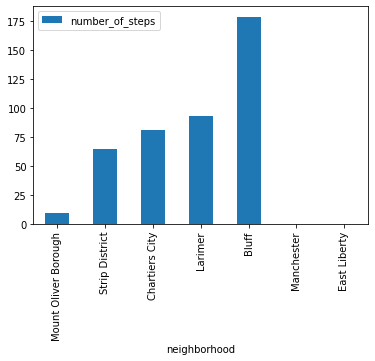

In [6]:
low_stair_neighborhoods.plot(x='neighborhood', y='number_of_steps', kind="bar")

Manchester and East Liberty aren't properly documented, so let's remove them from consideration.

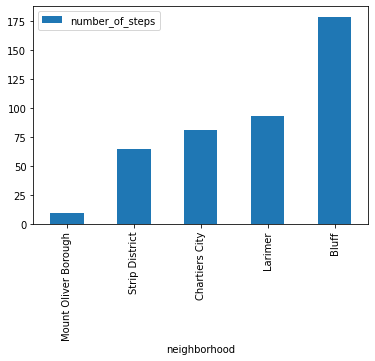

In [7]:
defined_low_stair_neighborhoods = low_stair_neighborhoods.groupby('number_of_steps').filter(lambda x: x['number_of_steps'].value_counts() != 0)
defined_low_stair_neighborhoods.plot(x='neighborhood', y='number_of_steps', kind="bar")

Mt. Oliver Borough is the clear winner for this particular metric. Let's create a query mask of Mt. Oliver to help with our conclusion.

In [8]:
mtoliver_query_mask = Stairs['neighborhood'] == "Mount Oliver Borough"
mtoliver_query = Stairs[mtoliver_query_mask]

In [9]:
print("MT. OLIVER BORO SUMMARY")
mtoliver_query['number_of_steps'].sum()
mtoliver_query['material']

MT. OLIVER BORO SUMMARY


id
850876938    Concrete
Name: material, dtype: object

With only 9 concrete stairs to traverse, Mt. Oliver Borough is a great neighborhood for running away from the alien invasion.

In [62]:
#neighborhood with most stairways is South Side Slopes with 108 Staircases

#adding all the neighborhoods to a dictionary for easier comparison with other metrics
stairsByNeighborhood = {}
for index, row in Stairs.iterrows():
    neighborhood = row['neighborhood']
    if neighborhood not in stairsByNeighborhood or :
        stairsByNeighborhood[neighborhood] = 1
    else:
        stairsByNeighborhood[neighborhood] -= 1/108
print(stairsByNeighborhood)

KeyError: 'South Oakland'